In [1]:
import json
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

import torch
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

from Utilities import score
from Utilities import plot_matrix_runs, plot_results
from Utilities import Add_ID_Count_Neighbours, PairData, prepare_dataloader_distance_scale

from training import training_loop

from models import GCN_pairs_distance

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
dataset = TUDataset(root='/tmp/MUTAG_transformed', name='MUTAG', pre_transform=Add_ID_Count_Neighbours()) 

### Results with different choices for L1 distance.
Here we use:
- L1 distance with absolute homomorphism counts
- L1 distance with homomorphism count densities
- L1 distance with rescaled homomorphism count density (NOT PRESENT HERE).

In [3]:
torch.manual_seed(1312)
train_loader, val_loader, test_loader = prepare_dataloader_distance_scale('data/homomorphism_counts/MUTAG_full_kernel_max_20_run1.homson', dataset, batch_size=32, dist='L1', device = device, scaling = 'counts')

In [4]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_L1_Counts', dist = 'L1').to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss().to(device)

In [5]:
train_losses, validation_losses = training_loop(model, train_loader, optimizer, criterion, val_loader, epoch_number=100, return_losses=True)

Epoch: 10 | Time for 10 epochs: 0m 25s
	Train Loss: 369148155562914.938
	 Val. Loss: 464293879730548.375
Epoch: 20 | Time for 10 epochs: 0m 24s
	Train Loss: 366400769002402.938
	 Val. Loss: 469738691827525.812
Epoch: 30 | Time for 10 epochs: 0m 25s
	Train Loss: 314818673447449.875
	 Val. Loss: 395866319689541.812
Epoch: 40 | Time for 10 epochs: 0m 32s
	Train Loss: 163163099516307.406
	 Val. Loss: 159028418373818.188
Epoch: 50 | Time for 10 epochs: 0m 31s
	Train Loss: 144598850219659.625
	 Val. Loss: 137748919401006.547
Epoch: 60 | Time for 10 epochs: 0m 30s
	Train Loss: 133123694789931.953
	 Val. Loss: 121180773822091.641
Epoch: 70 | Time for 10 epochs: 0m 25s
	Train Loss: 126055486671613.422
	 Val. Loss: 116537674718487.266
Epoch: 80 | Time for 10 epochs: 0m 24s
	Train Loss: 120250958861984.328
	 Val. Loss: 113923870067618.906
Epoch: 90 | Time for 10 epochs: 0m 26s
	Train Loss: 114380141602836.688
	 Val. Loss: 105786474376843.641
Epoch: 100 | Time for 10 epochs: 0m 32s
	Train Loss: 10

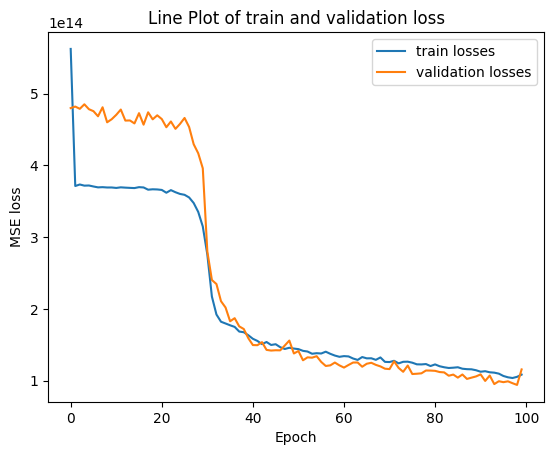

In [6]:
plt.plot(train_losses, label = 'train losses')
plt.plot(validation_losses, label = 'validation losses')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.title('Line Plot of train and validation loss')
plt.legend()
plt.show()

MSE Loss: 73072912629760.0


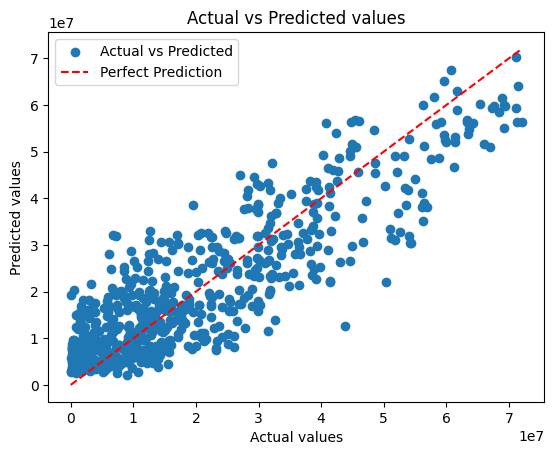

In [7]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_L1_Counts', dist = 'L1').to(device)
model.load_state_dict(torch.load("models/GCN_L1_Counts.pt"))
y, predictions = score(model, test_loader)
plot_results(y, predictions)

In [8]:
train_loader, val_loader, test_loader = prepare_dataloader_distance_scale('data/homomorphism_counts/MUTAG_full_kernel_max_20_run1.homson', dataset, batch_size=32, dist='L1', device = device, scaling = 'counts_density')

In [9]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_L1_Counts_Density', dist = 'L1').to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss().to(device)

In [10]:
train_losses, validation_losses = training_loop(model, train_loader, optimizer, criterion, val_loader, epoch_number=100, return_losses=True)

Epoch: 10 | Time for 10 epochs: 0m 30s
	Train Loss: 0.001
	 Val. Loss: 0.002
Epoch: 20 | Time for 10 epochs: 0m 33s
	Train Loss: 0.002
	 Val. Loss: 0.001
Epoch: 30 | Time for 10 epochs: 0m 28s
	Train Loss: 0.001
	 Val. Loss: 0.001
Epoch: 40 | Time for 10 epochs: 0m 31s
	Train Loss: 0.001
	 Val. Loss: 0.001
Epoch: 50 | Time for 10 epochs: 0m 28s
	Train Loss: 5.843
	 Val. Loss: 27.976
Epoch: 60 | Time for 10 epochs: 0m 28s
	Train Loss: 0.002
	 Val. Loss: 0.001
Epoch: 70 | Time for 10 epochs: 0m 29s
	Train Loss: 0.003
	 Val. Loss: 0.003
Epoch: 80 | Time for 10 epochs: 0m 29s
	Train Loss: 0.002
	 Val. Loss: 0.001
Epoch: 90 | Time for 10 epochs: 0m 29s
	Train Loss: 0.001
	 Val. Loss: 0.001
Epoch: 100 | Time for 10 epochs: 0m 28s
	Train Loss: 0.002
	 Val. Loss: 0.002
Best epoch was 42


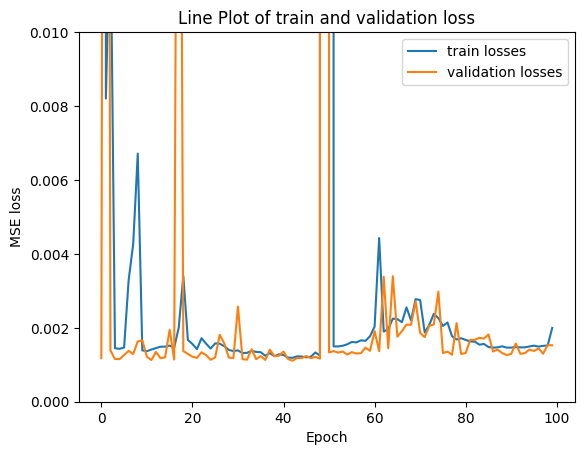

In [16]:
plt.plot(train_losses, label = 'train losses')
plt.plot(validation_losses, label = 'validation losses')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.ylim(0, 0.01)
plt.title('Line Plot of train and validation loss')
plt.legend()
plt.show()

MSE Loss: 0.0009416808024980128


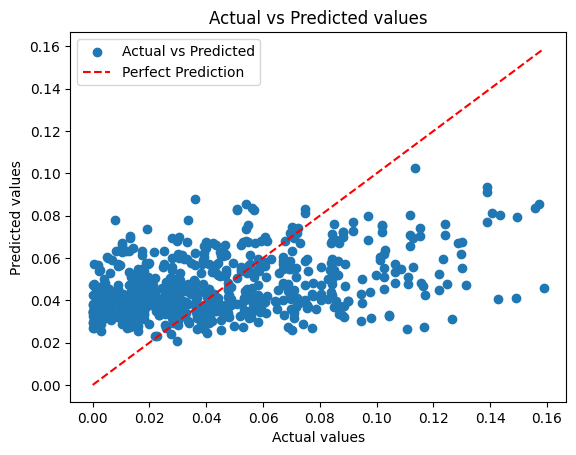

In [17]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_L1_Counts_Density', dist = 'L1').to(device)
model.load_state_dict(torch.load("models/GCN_L1_Counts_Density.pt"))
y, predictions = score(model, test_loader)
plot_results(y, predictions)

### Results with different choices for cosine distance.
Here we use:
- cosine distance based on homomorphism counts
- cosine distance with homomorphism count densities

In [18]:
train_loader, val_loader, test_loader = prepare_dataloader_distance_scale('data/homomorphism_counts/MUTAG_full_kernel_max_20_run1.homson', dataset, batch_size=32, dist='cosine', device = device, scaling = 'counts')

In [19]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_cosine_counts', dist = 'cosine').to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss().to(device)

In [20]:
train_losses, validation_losses = training_loop(model, train_loader, optimizer, criterion, val_loader, epoch_number=100, return_losses=True)

Epoch: 10 | Time for 10 epochs: 0m 23s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 20 | Time for 10 epochs: 0m 28s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 30 | Time for 10 epochs: 0m 30s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 40 | Time for 10 epochs: 0m 31s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 50 | Time for 10 epochs: 0m 32s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 60 | Time for 10 epochs: 0m 32s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 70 | Time for 10 epochs: 0m 29s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 80 | Time for 10 epochs: 0m 28s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 90 | Time for 10 epochs: 0m 31s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 100 | Time for 10 epochs: 0m 29s
	Train Loss: 0.000
	 Val. Loss: 0.000
Best epoch was 94


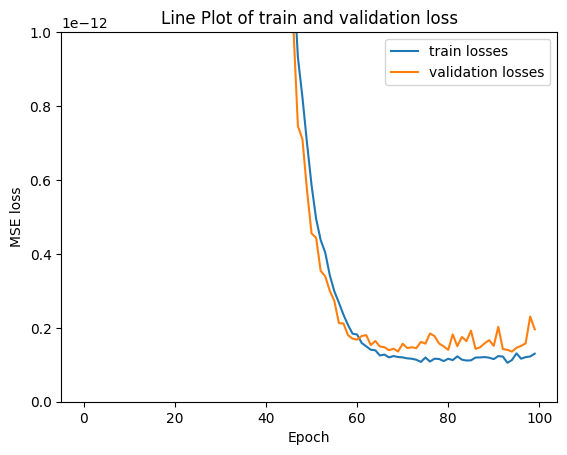

In [31]:
plt.plot(train_losses, label = 'train losses')
plt.plot(validation_losses, label = 'validation losses')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.title('Line Plot of train and validation loss')
plt.legend()
plt.ylim(0, 0.000000000001)
plt.show()

MSE Loss: 2.2321285987093875e-13


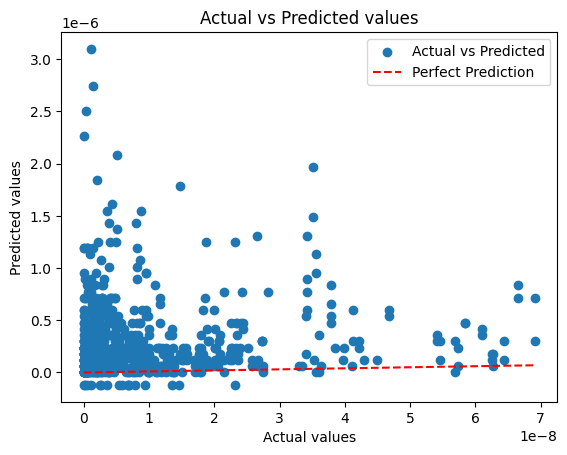

In [28]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_cosine_counts', dist = 'cosine').to(device)
model.load_state_dict(torch.load("models/GCN_cosine_counts.pt"))
y, predictions = score(model, test_loader)
plot_results(y, predictions)

In [32]:
train_loader, val_loader, test_loader = prepare_dataloader_distance_scale('data/homomorphism_counts/MUTAG_full_kernel_max_20_run1.homson', dataset, batch_size=32, dist='cosine', device = device, scaling = 'counts_density')

In [33]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_cosine_counts_density', dist = 'cosine').to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss().to(device)

In [34]:
train_losses, validation_losses = training_loop(model, train_loader, optimizer, criterion, val_loader, epoch_number=100, return_losses=True)

Epoch: 10 | Time for 10 epochs: 0m 23s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 20 | Time for 10 epochs: 0m 24s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 30 | Time for 10 epochs: 0m 27s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 40 | Time for 10 epochs: 0m 28s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 50 | Time for 10 epochs: 0m 29s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 60 | Time for 10 epochs: 0m 30s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 70 | Time for 10 epochs: 0m 33s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 80 | Time for 10 epochs: 0m 29s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 90 | Time for 10 epochs: 0m 27s
	Train Loss: 0.000
	 Val. Loss: 0.000
Epoch: 100 | Time for 10 epochs: 0m 29s
	Train Loss: 0.000
	 Val. Loss: 0.000
Best epoch was 37


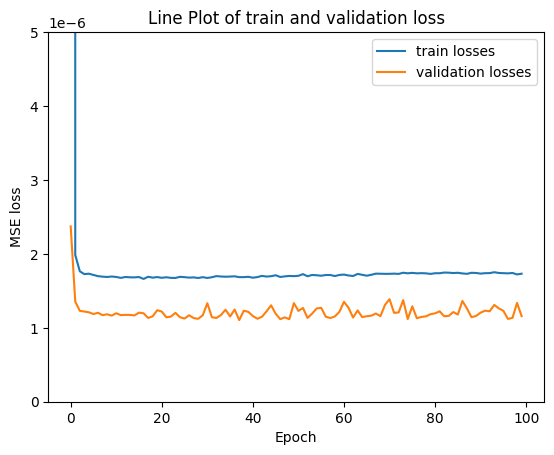

In [35]:
plt.plot(train_losses, label = 'train losses')
plt.plot(validation_losses, label = 'validation losses')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.title('Line Plot of train and validation loss')
plt.ylim(0, 0.000005)
plt.legend()
plt.show()

MSE Loss: 1.5158559563133167e-06


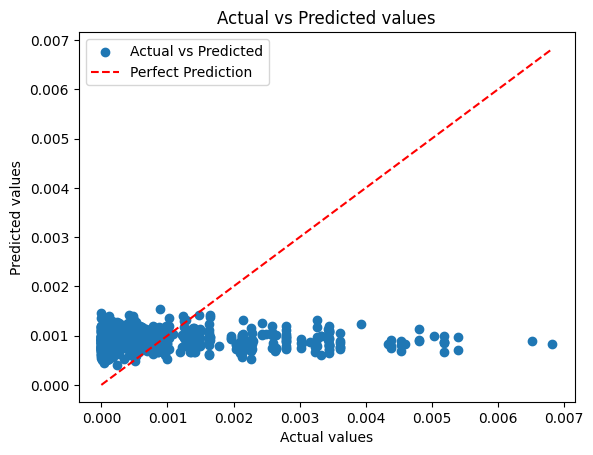

In [36]:
model = GCN_pairs_distance(input_features=dataset.num_node_features, hidden_channels=64, output_embeddings=300, name='GCN_cosine_counts_density', dist = 'cosine').to(device)
model.load_state_dict(torch.load("models/GCN_cosine_counts_density.pt"))
y, predictions = score(model, test_loader)
plot_results(y, predictions)